In [1]:
# from CaltransTab import *
import requests
import os
import numpy as np
import itertools
import time
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
abbreviations = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

51

In [2]:
county['ID'] = county['County'].str.replace(' ', '').str[:4]
county.head()

numbers = np.arange(0,10)
new_array = []

for id in county['ID']:
    for number in numbers:
        new_string = f"CA{id}{number}POP"
        new_array.append(new_string)

In [28]:
file_names = []
for i in new_array:
    file_name = f'cty_pop/{i}.xls'
    if os.path.isfile(file_name):
        #print(i)
        file_names.append(i)

file_names = sorted(list(set(file_names)))
county['FileName'] = file_names

In [29]:
percent_change = []
for i in county['FileName']:
    df = pd.read_excel(f'cty_pop/{i}.xls').iloc[41:]['Unnamed: 1'].reset_index(drop=True).to_frame().astype(float).rename(columns={'Unnamed: 1': 'Population'})
    df['% Change'] = df/(df.values[0]) - 1
    percent_change.append(df['% Change'].iloc[-1])

county['2001 to 2023'] = percent_change

In [ ]:
# 2 hour download

df = pd.read_excel('uscounties.xlsx')
numbers = np.arange(0,10)

for index, row in df.iloc[400:].iterrows():
    id = row['county'].replace(' ', '')[:4].upper()
    stateid = row['state_id']
    file_written = False
    for number in numbers:
        ID = f"{stateid}{id}{number}POP"
        params = {
        'bgcolor': '#e1e9f0',
        'chart_type': 'line',
        'drp': '0',
        'fo': 'open sans',
        'graph_bgcolor': '#ffffff',
        'height': '450',
        'mode': 'fred',
        'recession_bars': 'on',
        'txtcolor': '#444444',
        'ts': '12',
        'tts': '12',
        'width': '958',
        'nt': '0',
        'thu': '0',
        'trc': '0',
        'show_legend': 'yes',
        'show_axis_titles': 'yes',
        'show_tooltip': 'yes',
        'id': ID,
        'scale': 'left',
        'cosd': '1970-01-01',
        'coed': '2023-01-01',
        'line_color': '#4572a7',
        'link_values': 'false',
        'line_style': 'solid',
        'mark_type': 'none',
        'mw': '3',
        'lw': '2',
        'ost': '-99999',
        'oet': '99999',
        'mma': '0',
        'fml': 'a',
        'fq': 'Annual',
        'fam': 'avg',
        'fgst': 'lin',
        'fgsnd': '2020-02-01',
        'line_index': '1',
        'transformation': 'lin',
        'vintage_date': '2024-04-19',
        'revision_date': '2024-04-19',
        'nd': '1970-01-01',
        }

        response = requests.get('https://fred.stlouisfed.org/graph/fredgraph.xls', params=params)
        filename = f'cty_pop/{ID}.xls'
        if len(response.content) < 20 * 1024:
            # Write the response content to the file
            with open(filename, 'wb') as file:
                file.write(response.content)
            print(f'{filename} ok')
            file_written = True
            break
        else:
            print(f'Response content for {filename} was too large and was not saved.')
    if file_written:
        continue


In [38]:
NYua = ['NYNEWY', 'NYKING', 'NYBRON', 'NYRICH', 'NYQUEE',
        'NJHUDS', 'NJBERG', 'NJESSE', 'NJUNIO', 'NJMIDD',
        'NJMONM', 'NJOCEA', 'NJPASS', 'NJMORR', 'NJSOME',
        'CTFAIR', 'CTNEWH']

In [40]:
numbers = np.arange(0,10)
total_pop = []

for number in numbers:
    for cty in NYua:
        try:
            county_pop = pd.read_excel(f'cty_pop/{cty}{number}POP.xls')
            county_pop = county_pop.iloc[34:]['Unnamed: 1'].reset_index(drop=True).to_frame().astype(float).rename(columns={'Unnamed: 1': 'Population'})['Population']
            total_pop.append(county_pop.cumsum())
        except FileNotFoundError:
            print(f"File cty_pop/{cty}{number}POP.xls not found.")
            continue

total_pop

File cty_pop/NYNEWY0POP.xls not found.
File cty_pop/NYKING0POP.xls not found.
File cty_pop/NYBRON0POP.xls not found.
File cty_pop/NYRICH0POP.xls not found.
File cty_pop/NYQUEE0POP.xls not found.
File cty_pop/NJHUDS0POP.xls not found.
File cty_pop/NJBERG0POP.xls not found.
File cty_pop/NJESSE0POP.xls not found.
File cty_pop/NJUNIO0POP.xls not found.
File cty_pop/NJMIDD0POP.xls not found.
File cty_pop/NJMONM0POP.xls not found.
File cty_pop/NJOCEA0POP.xls not found.
File cty_pop/NJPASS0POP.xls not found.
File cty_pop/NJMORR0POP.xls not found.
File cty_pop/CTFAIR0POP.xls not found.
File cty_pop/CTNEWH0POP.xls not found.
File cty_pop/NYKING1POP.xls not found.
File cty_pop/NYBRON1POP.xls not found.
File cty_pop/NYRICH1POP.xls not found.
File cty_pop/NJHUDS1POP.xls not found.
File cty_pop/NJBERG1POP.xls not found.
File cty_pop/NJESSE1POP.xls not found.
File cty_pop/NJUNIO1POP.xls not found.
File cty_pop/NJMIDD1POP.xls not found.
File cty_pop/NJMONM1POP.xls not found.
File cty_pop/NJOCEA1POP.x

[0      262.243
 1      529.406
 2      802.278
 3     1082.473
 4     1369.538
 5     1663.308
 6     1962.267
 7     2264.548
 8     2570.850
 9     2880.187
 10    3192.362
 11    3507.064
 12    3824.514
 13    4144.808
 14    4467.404
 15    4793.285
 16    5117.405
 17    5443.682
 18    5771.144
 19    6100.196
 20    6429.574
 21    6759.256
 22    7089.259
 23    7419.909
 24    7750.681
 25    8080.679
 26    8425.433
 27    8771.931
 28    9118.978
 29    9467.820
 Name: Population, dtype: float64,
 0      1503.909
 1      3018.093
 2      4539.508
 3      6066.892
 4      7597.959
 5      9133.583
 6     10674.614
 7     12237.552
 8     13805.593
 9     15385.915
 10    16976.826
 11    18583.101
 12    20195.731
 13    21820.982
 14    23452.178
 15    25080.113
 16    26669.154
 17    28277.871
 18    29902.444
 19    31530.823
 20    33162.556
 21    34799.883
 22    36436.604
 23    38068.941
 24    39701.334
 25    41333.660
 26    43010.892
 27    44588.947
 28    46

In [2]:
def concatenate_dfs(ua, numbers):
    df_list = []
    for number in numbers:
        for cty in ua:
            try:
                county_pop = pd.read_excel(f'cty_pop/{cty}{number}POP.xls')
                county_pop = county_pop.iloc[34:]['Unnamed: 1'].reset_index(drop=True).to_frame().astype(float).rename(columns={'Unnamed: 1': 'Population'})['Population']
                df_list.append(county_pop)
            except FileNotFoundError:
                # print(f"File cty_pop/{cty}{number}POP.xls not found.")
                continue
    total_df = pd.concat(df_list, axis=1).sum(axis=1)
    return total_df

NYua = ['NYNEWY', 'NYKING', 'NYBRON', 'NYRICH', 'NYQUEE',
        'NJHUDS', 'NJBERG', 'NJESSE', 'NJUNIO', 'NJMIDD',
        'NJMONM', 'NJOCEA', 'NJPASS', 'NJMORR', 'NJSOME',
        'CTFAIR', 'CTNEWH']

numbers = np.arange(0,10)
total_df = concatenate_dfs(NYua, numbers)

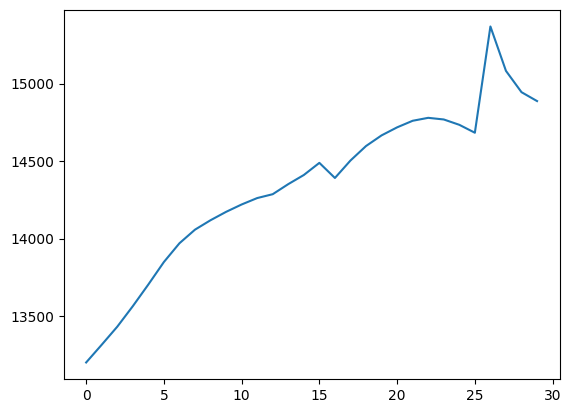

In [3]:
plt.plot(total_df)